#**ANALYSE TEXTUELLE : tokénisation, lemmatisation, syntaxe et entités nommées**

In [ ]:
!pip install stanza

##Qu'est-ce que c'est que l'analyse textuelle (automatique), rapidement
En fait ça peut toucher beaucoup de domaines. Ici, on va en voir plusieurs, entre autres la **tokenisation**, la **lemmatisation**, le **postagging**. J'appellerai ça les étapes de "pre-processing", de travail préliminaire.
<br>En effet, on a très souvent besoin, pour faire des choses plus poussées, de ces étapes pour éviter de créer des biais dans les analyses qui vont suivre.

##Comment on pré-traite ?
Il y a plusieurs écoles, et donc aussi plusieurs modules pour le faire.
<br>D'expérience personnelle, il y a les modules rapides et qui donnent des résultats plus mitigés, et des modules plus longs qui sont généralement meilleurs (mais pas forcément).
<br>Ici, je vais vous montrer plusieurs outils avec des qualités et des défauts, pour le français (mais ils ont aussi des modèles en d'autres langues).

##**Quelques outils en ligne utiles**

###**UDPipe**
<br>Vous le trouverez [ici](https://lindat.mff.cuni.cz/services/udpipe/).
<br>C'est un bon outil pour un texte court. Dès que vous allez faire un texte intégral ou un peu long, ça rame très vite.
<br>Mais vous avez des fonctionnalités sympathiques, type les arbres syntaxiques en images vectorielles.**texte en gras**

###**Deucalion**
<br>Vous le trouverez [ici](https://dh.chartes.psl.eu/deucalion/api/fr/).
<br>Bien plus gérable pour les textes longs. Une sortie pas sexy, mais ce n'est pas ce qu'on lui demande. Il est surtout très efficace pour des langues plus rares, type l'ancien français ou le grec et le latin.

###**VoyantTools**
<br>Vous le trouverez [ici](https://voyant-tools.org/).
<br>C'est un outil de visualisation. C'est pratique et un peu shiny, mais on peut faire des choses très développées dessus.

#**LE TAL : TOKENISATION, LEMMATISATION, POSTAGGING**

Nous allons tester un outil principal, qui permet de faire ces trois actions, **`stanza`**. Il en existe beaucoup d'autres (notamment spacy et pie-extended), mais stanza est le plus performant en termes de rapport qualité/temps.

In [ ]:
catilinaires="Quousque tandem abutere, Catilina, patientia nostra ? Quamdiu etiam furor iste tuus nos eludet ? Quem ad finem sese effrenata jactabit audacia ? Nihilne te nocturnum praesidium Palatii, nihil urbis vigiliae, nihil timor populi, nihil concursus bonorum omnium, nihil hic munitissimus habendi senatus locus, nihil horum ora vultusque moverunt ? Patere tua consilia non sentis ? Constrictam jam horum omnium scientia teneri conjurationem tuam non vides ? Quid proxima, quid superiore nocte egeris, ubi fueris, quos convocaveris, quid consilii ceperis, quem nostrum ignorare arbitraris ? O tempora ! O mores ! Senatus haec intellegit, consul videt. Hic tamen vivit."

##**stanza (précédemment Stanford CoreNLP)**

Personnellement, c'est l'analyseur que j'utilise quand je n'ai pas besoin de faire de représentations graphiques de mes résultats. Il est rapide et efficace.

Je mentionne `stanza` en particulier pour trois raisons :
<br>- d'abord parce qu'il dispose d'un très grand nombre de modèles de langue, et pas forcément des langues très répandues,
<br>- ensuite parce qu'il est très rapide, et niveau performance tout à fait satisfaisant pour les gros corpus,
<br>- enfin parce que je le trouve facile à manipuler et à implémenter.

Mais il faut garder en tête qu'il en existe bien d'autres qui fonctionnent vraiment très bien, avec un nombre de modèles qui se multiplie. Je pense au tagger de BERT,  ou de `flair` entre autres. Mais ça nécessite d'être un peu plus aguerri.

Là encore, il existe plusieurs modèles rien que pour le français (je vous mets ici la [liste des modèles](https://stanfordnlp.github.io/stanza/available_models.html) dans d'autres langues), mais le modèle par défaut peut être appelé avec `la` pour le latin et `grc` pour le grec ancien.

In [ ]:
import stanza
stanza.download('la', package="perseus")

On commence par lui spécifier une Pipeline, c'est-à-dire qu'on lui signifie quels processeurs il va devoir mobiliser pour les opérations suivantes et en quelle langue. L'avantage de cette opération est qu'on ne mobilise pas l'artillerie lourde quand on veut faire des opérations simples).

In [ ]:
nlp_stanza = stanza.Pipeline(lang='la', package="perseus", processors='tokenize,pos,lemma, depparse')

Maintenant, nous pouvons lancer le TAL sur l'ensemble du texte (il est beaucoup plus rapide que `spacy` à cet égard).

In [ ]:
catilinaires_analyzed=nlp_stanza(catilinaires)

Voyons maintenant ses résultats.

In [ ]:
for sent in catilinaires_analyzed.sentences:
  print("XXXXX "+sent.text+" XXXXX")

XXXXX Quousque tandem abutere, Catilina, patientia nostra ? Quamdiu etiam furor iste tuus nos eludet ? Quem ad finem sese effrenata jactabit audacia ? Nihilne te nocturnum praesidium Palatii, nihil urbis vigiliae, nihil timor populi, nihil concursus bonorum omnium, nihil hic munitissimus habendi senatus locus, nihil horum ora vultusque moverunt ? Patere tua consilia non sentis ? Constrictam jam horum omnium scientia teneri conjurationem tuam non vides ? Quid proxima, quid superiore nocte egeris, ubi fueris, quos convocaveris, quid consilii ceperis, quem nostrum ignorare arbitraris ? O tempora ! O mores ! Senatus haec intellegit, consul videt. XXXXX
XXXXX Hic tamen vivit. XXXXX


In [ ]:
for sent in catilinaires_analyzed.sentences:
  for token in sent.words:
    print(token.text + ' - ' + token.lemma + ' - ' + token.pos)

Quousque - quo - ADV
tandem - tandem - ADV
abutere - abutor - VERB
, - , - PUNCT
Catilina - Catilina - NOUN
, - , - PUNCT
patientia - patientia - NOUN
nostra - noster - PRON
? - ? - PUNCT
Quamdiu - quamdius - ADV
etiam - etiam - CCONJ
furor - furor - NOUN
iste - iste - PRON
tuus - tuus - PRON
nos - nos - PRON
eludet - eludo - VERB
? - ? - PUNCT
Quem - qui - PRON
ad - ad - ADP
finem - finis - NOUN
sese - sui - PRON
effrenata - effreno - VERB
jactabit - jacto - VERB
audacia - audacia - NOUN
? - ? - PUNCT
Nihilne - nihel - NOUN
te - tu - PRON
nocturnum - nocturnus - ADJ
praesidium - praesidium - NOUN
Palatii - Palatius - NOUN
, - , - PUNCT
nihil - nihil - NOUN
urbis - urbs - NOUN
vigiliae - vigilia - NOUN
, - , - PUNCT
nihil - nihil - NOUN
timor - timor - NOUN
populi - populus - NOUN
, - , - PUNCT
nihil - nihil - NOUN
concursus - concursus - NOUN
bonorum - bonus - ADJ
omnium - omnis - ADJ
, - , - PUNCT
nihil - nihil - NOUN
hic - hic - PRON
munitissimus - munitus - ADJ
habendi - habeo - VE

# Avec votre texte maintenant

Normalement, vous avez sur vous une sortie d'HTR presque propre.
<br>Vous aurez besoin d'un texte enregistré en ".txt". Je ne garantis pas la qualité des résultats.
<br>Une fois que vous avez votre texte, vous devez appuyer sur l'icône "dossier" sur la gauche de l'écran, et faire glisser le fichier dans la colonne blanche jusqu'à voir un "+". Votre texte va s'importer dans l'environnement Colab.
<br>Nous allons maintenant lancer une analyse automatique avec `stanza`, qui sera en latin par défaut ici.
<br>Nous ne pourrons pas le faire exactement de la même manière que précédemment car le texte est plus long, et il faudra ménager un peu la mémoire de colab.
<br>Si vous travaillez sur du grec, changez simplement les endroits où vous voyez `"la"` en `"grc"`.

J'utilise généralement `stanza` pour trois raisons :
<br>- il y a un très grand nombre de langues traitées (Vous pouvez les consulter [ici](https://stanfordnlp.github.io/stanza/performance.html)),
<br>- c'est très rapide et ça fait un excellent usage de la GPU,
<br>- c'est facile à implémenter.

In [ ]:
def batch_process(text, nlp, batch_size=50):
    paragraphs = text.split('\n')
    batches = [paragraphs[i:i + batch_size] for i in range(0, len(paragraphs), batch_size)]

    words = []

    for batch in batches:
        batch_text = '\n'.join(batch)
        doc = nlp(batch_text)
        for sentence in doc.sentences:
            for word in sentence.words:
                token={}
                if word.lemma is not None:
                    token["word"]=word.text
                    token["lemma"]=word.lemma
                    token["pos"]=word.pos
                    words.append(token)

    return words

In [ ]:
import stanza
stanza.download('la')
import string

INFO:stanza:Downloading default packages for language: la (Latin) ...
INFO:stanza:File exists: /root/stanza_resources/la/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/philo_num_grenoble_24/main/catilinaires.txt

In [ ]:
filepath_of_text = "/content/catilinaires.txt"

In [ ]:
full_text = open(filepath_of_text, encoding="utf-8").read()

Beaucoup de modèles ont beaucoup de processus embarqués, et sont trop lourds. Je vous recommande d'être plus sélectifs lors de l'instanciation des processus. Vous pouvez le faire de cette manière :

In [ ]:
nlp_stanza = stanza.Pipeline(lang='la', processors='tokenize,pos,lemma')

In [ ]:
latin_analyzed = batch_process(full_text, nlp_stanza)

In [ ]:
print(latin_analyzed[5:15])

[{'word': 'Catilina', 'lemma': 'Catilina', 'pos': 'NOUN'}, {'word': ',', 'lemma': ',', 'pos': 'PUNCT'}, {'word': 'patientia', 'lemma': 'patientia', 'pos': 'NOUN'}, {'word': 'nostra', 'lemma': 'noster', 'pos': 'DET'}, {'word': '?', 'lemma': '?', 'pos': 'PUNCT'}, {'word': 'quam', 'lemma': 'qui', 'pos': 'PRON'}, {'word': 'diu', 'lemma': 'diu', 'pos': 'ADV'}, {'word': 'etiam', 'lemma': 'etiam', 'pos': 'ADV'}, {'word': 'furor', 'lemma': 'furor', 'pos': 'NOUN'}, {'word': 'iste', 'lemma': 'iste', 'pos': 'DET'}]


Pour une de nos expériences à venir, nous allons avoir besoin d'une liste de mots outils, que vous pourrez modifier à votre guise (il s'agit, pour le latin, du fichier stopwords_lat.txt, et pour le grec, du fichier stopwords_gk.txt).
<br>Si vous souhaitez utiliser le fichier pour le latin, faites ce code :
```python
!wget https://github.com/OdysseusPolymetis/digital_classics_course/blob/main/stopwords_lat.txt
```
et pour le grec :
```python
!wget https://github.com/OdysseusPolymetis/digital_classics_course/blob/main/stopwords_gk.txt
```


In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/digital_classics_course/main/stopwords_lat.txt

--2024-02-21 16:20:13--  https://raw.githubusercontent.com/OdysseusPolymetis/digital_classics_course/main/stopwords_lat.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35385 (35K) [text/plain]
Saving to: ‘stopwords_lat.txt’

stopwords_lat.txt   100%[===================>]  34.56K  --.-KB/s    in 0s      

2024-02-21 16:20:13 (136 MB/s) - ‘stopwords_lat.txt’ saved [35385/35385]



In [ ]:
stopwords = open("/content/stopwords_lat.txt",'r',encoding="utf8").read().split("\n")

In [ ]:
forms = []
lemmas = []
no_stop = []

for token in latin_analyzed:
    form = token["word"]
    lemma = token["lemma"]

    if lemma not in string.punctuation:
        forms.append(form)
        lemmas.append(lemma)

    if lemma not in string.punctuation and lemma not in stopwords:
        no_stop.append(lemma)

In [ ]:
len(lemmas)

3630

In [ ]:
len(no_stop)

1925

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def create_word_cloud(words_list, title):
    text = ' '.join(words_list)

    radius = 495
    diameter = radius * 2
    center = radius
    x, y = np.ogrid[:diameter, :diameter]
    mask = (x - center) ** 2 + (y - center) ** 2 > radius ** 2
    mask = 255 * mask.astype(int)

    mask_rgba = np.dstack((mask, mask, mask, 255 - mask))

    wordcloud = WordCloud(repeat=False, width=diameter, height=diameter,
                          background_color=None, mode="RGBA", colormap='plasma',
                          mask=mask_rgba).generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

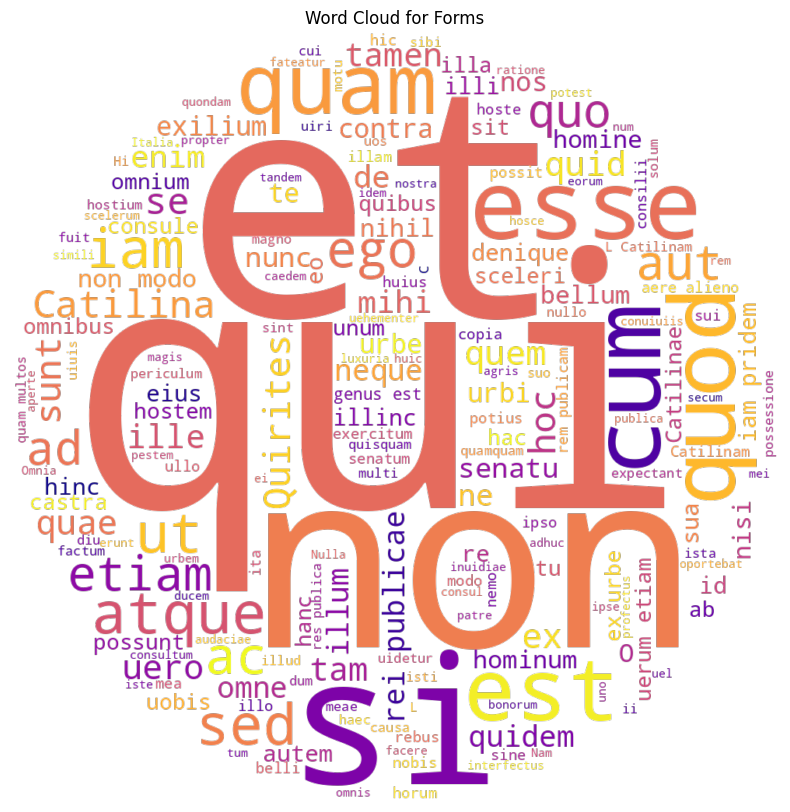

In [ ]:
create_word_cloud(forms, 'Word Cloud for Forms')

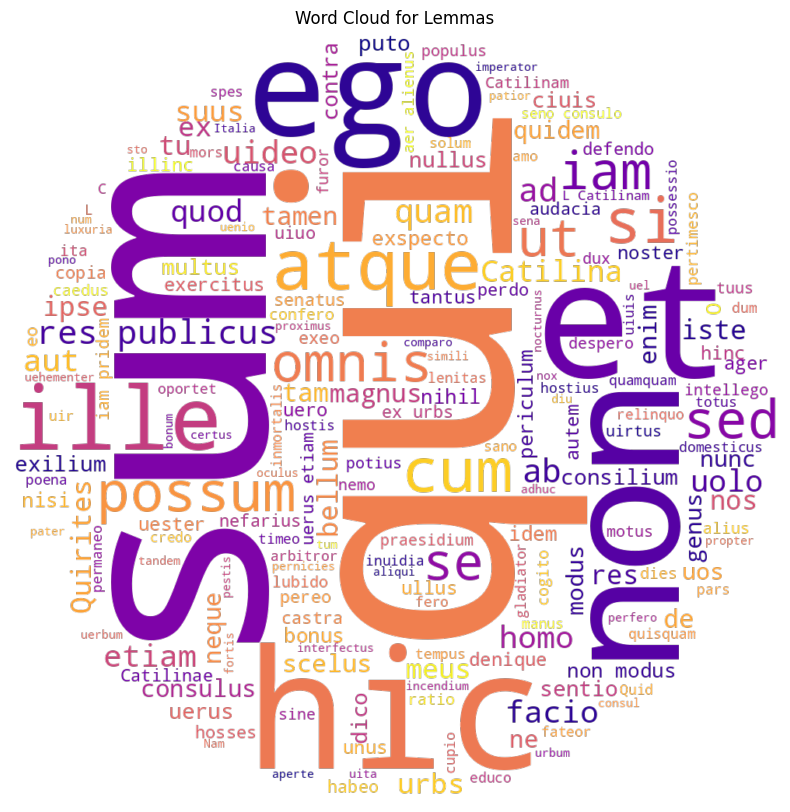

In [ ]:
create_word_cloud(lemmas, 'Word Cloud for Lemmas')

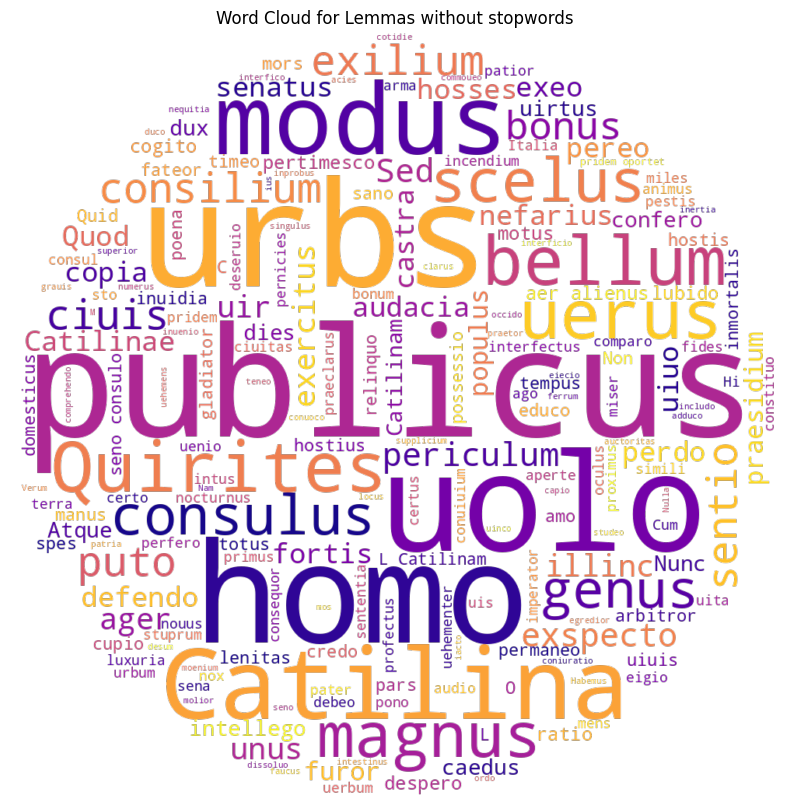

In [ ]:
create_word_cloud(no_stop, 'Word Cloud for Lemmas without stopwords')